In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA,KernelPCA


from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import plot_confusion_matrix as pcm
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import linear_model



In [2]:
# Obtain the data for linear regression

x_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')
#Test = pd.read_csv('data/X_test.csv')
#y_train = pd.read_csv('data/y_train.csv')

x_train.drop('Id', inplace=True, axis=1)
x_train = pd.get_dummies(x_train)
x_train = x_train.fillna(x_train.median())

train, test, y_train, y_test = train_test_split(x_train, y_train.Expected,test_size=0.6, random_state=42)




In [3]:
Test = pd.read_csv('data/X_test.csv')
Test.drop('Id', inplace=True, axis=1)
Test = pd.get_dummies(Test)
Test = Test.fillna(Test.median())

In [4]:
len(train)
#print(x_train.columns)
#does the same as next
#x_train.nunique()
headers = []

for col in train.columns:
	if len(train[col].value_counts()) < len(train)/2:
		headers.append(col)
		print(col,len(train[col].value_counts()))

train = train[headers]
Test = Test[headers]
test = test[headers]


ab_000 20
ac_000 1282
ad_000 1201
ae_000 165
af_000 188
ag_000 54
ag_001 200
ag_002 792
ag_003 2804
ag_008 7414
ag_009 2675
ai_000 1402
aj_000 434
ak_000 50
al_000 3828
am_0 4329
ar_000 40
as_000 8
at_000 1342
au_000 16
av_000 2187
ax_000 1291
ay_000 144
ay_001 287
ay_002 296
ay_003 320
ay_004 546
ay_005 6861
ay_009 147
az_000 4982
az_001 3763
az_002 4549
az_006 5215
az_007 1411
az_008 483
az_009 141
ba_008 4312
ba_009 2371
bc_000 1428
bd_000 1858
be_000 2123
bf_000 600
bk_000 6451
bl_000 5682
bm_000 3553
bn_000 2596
bo_000 2033
bp_000 1693
bq_000 1435
br_000 1265
bs_000 7660
bz_000 6577
cd_000 1
cf_000 222
cg_000 394
ch_000 2
cj_000 2497
cl_000 501
cm_000 1193
cn_000 521
cn_001 1952
cn_002 5710
cn_008 5388
cn_009 1550
co_000 1033
cp_000 1209
cr_000 21
cs_000 5507
cs_001 1869
cs_008 548
cs_009 29
ct_000 1606
cu_000 1954
cy_000 353
cz_000 4367
da_000 114
db_000 98
dd_000 3739
de_000 1123
df_000 154
dg_000 405
dh_000 486
di_000 1857
dj_000 24
dk_000 62
dl_000 47
dm_000 53
dp_000 6015
dq_

In [ ]:
#x_train.drop('Id', inplace=True, axis=1)
train = pd.get_dummies(train)
train = train.fillna(train.median())

In [5]:
#y_train.Expected
#y_train.nunique()
y_train.value_counts()

0    15669
1      291
Name: Expected, dtype: int64

0.9878028404344193
0.8172718371470313


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


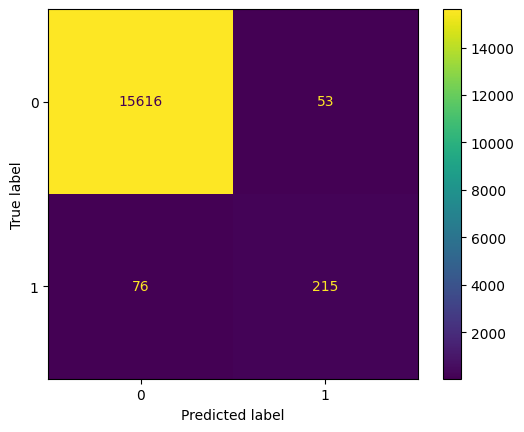

In [15]:

clf = DTC(random_state=42,criterion = "gini",min_samples_split = 50,max_features = "sqrt")#"entropy"  #log_loss
clf.fit(train,y_train)
predicted_Y = clf.predict(test)
Y_test_proba = clf.predict_proba(test)[:,1]


print(acc(y_test,predicted_Y))

print(bas(y_test,predicted_Y))
pcm(clf,train,y_train)
predicted_Y = clf.predict(Test)


In [ ]:
pca = PCA(n_components=12)
pca = pca.fit(train)
train_pca = pca.transform(train)

test_pca = pca.transform(test)

Real_pca = pca.transform(Test)

#reg = linear_model.BayesianRidge()

#plt.scatter(train_pca)
#plt.scatter(train_pca[:,0],train_pca[:,1],c=y_train)
#plt.show()

clf = DTC(random_state=42,criterion = "gini",min_samples_split = 100,max_features = "sqrt")#"entropy"  #log_loss
clf = clf.fit(train_pca,y_train)
#reg = reg.fit(train_pca,y_train)

#print(reg.coef_)

predicted_Y = clf.predict(test_pca)
#predicted_Y = reg.predict(test_pca)
#Y_test_proba = clf.predict_proba(test_pca)[:,1]


print(acc(y_test,predicted_Y))

print(bas(y_test,predicted_Y,adjusted=True))
#print(bas(y_test,predicted_Y,adjusted=False))

pcm(clf,train_pca,y_train)



In [16]:
#predicted_Y = clf.predict(Real_pca)
print(len(predicted_Y), sum(predicted_Y))

17100 300


In [ ]:
len(predicted_Y)

f = open("schmidt_laszlo_reduced_dtc.csv",'w')

f.write("Id,Predicted\n")
for i,val in enumerate(predicted_Y):
	f.write("{},{}\n".format(i,val))

f.flush()
f.close()

In [ ]:
pca = PCA(n_components=2)
pca = pca.fit(train)
a = pca.transform(train)
print(pca.explained_variance_ratio_)

print(len(train),",",len(a))
#plt.scatter(a,y_test)
#plt.show()

